In [1]:
%load_ext rpy2.ipython

In [ ]:
### do something here with OPen CV

In [ ]:
%%R -i df

In [2]:
%%R

#### keywords: spatial statistics, SPARC, K-function, data courtesy of Nikki Pelot
#### Hackathon 2018

########################################################################################
#### Some useful libraries that are used later
########################################################################################

#require(caret) for machine learning 
#require(tibble) for interacting with complex tables and data frames

require(magrittr)
require(dplyr)

#require(multcomp) for ANOVA
#require(emmeans)  for ANOVA

require(spatstat) ### for spatial statistics
require(png)  ### for loading the boundary maps in PNG format
library(httr) #### for data download

library(lctools) ### for spatial autocorrelation 
library(dixon)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: magrittr

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: dplyr

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required

Response [https://uc941023de885253d9ffd0be47f4.dl.dropboxusercontent.com/cd/0/get/AW-qxEMWKPemOTgoqWTFxCFqk_fSmUJg6q_oKNUp1sSY0M_pfuKK6uo3_yECOf6BjETcN6r1bfIn46EhSG5PeqVAqxuCKNpxN1TOpjSDY-AbRbnaAB3hnY7cI8ztk7I4S3vOChrxcE7dopmPcrQVOWMgVJOlqGm_N3bIpz9oIwWVHl_kK1ftqx0ZH0l7JUh27kw/file?dl=1]
  Date: 2018-12-06 22:16
  Status: 200
  Content-Type: application/binary
  Size: 121 kB
<ON DISK>  /tmp/Rtmp0EFDoV/fileac32e28e23c.csvNULL

Response [https://ucb4fc2638c493a8228cfc95bd52.dl.dropboxusercontent.com/cd/0/get/AW89fk8VRebf4IfGkNdkn452Jpcj-wE5ogu1bPT9Z_lzXVMF7_ti1bOYWHzStg1VnIE95Bip6F91XTPabCGGItlxjjiC19BR75rTyi5LThB_1CqpXdwazKGTglGOVBaAR3T8J8CseBnOlntG_CA7LaeMBePFaSwuYJZyLSpDLJ2WtcA1G3-bL1_MnVa13t3iYi0/file?dl=1]
  Date: 2018-12-06 22:16
  Status: 200
  Content-Type: application/binary
  Size: 4.32 kB
<ON DISK>  /tmp/Rtmp0EFDoV/fileac34181b191.pngNULL

Warning message:
“27 points were rejected as lying outside the specified window”Warning message in plot.ppp(spat.ppp):
“27 illegal points also plotted”

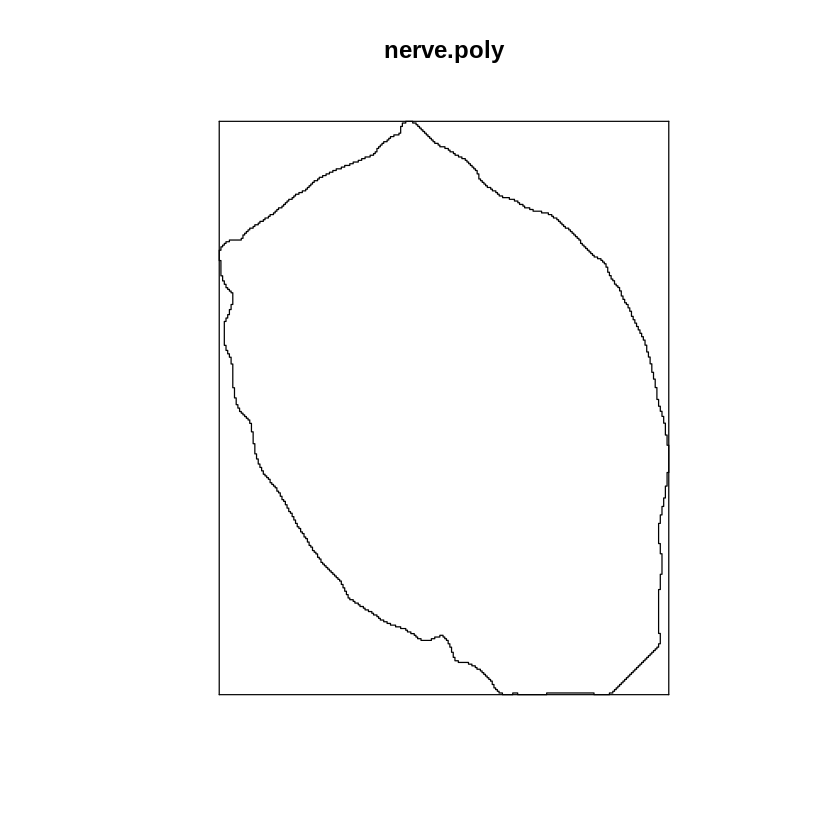

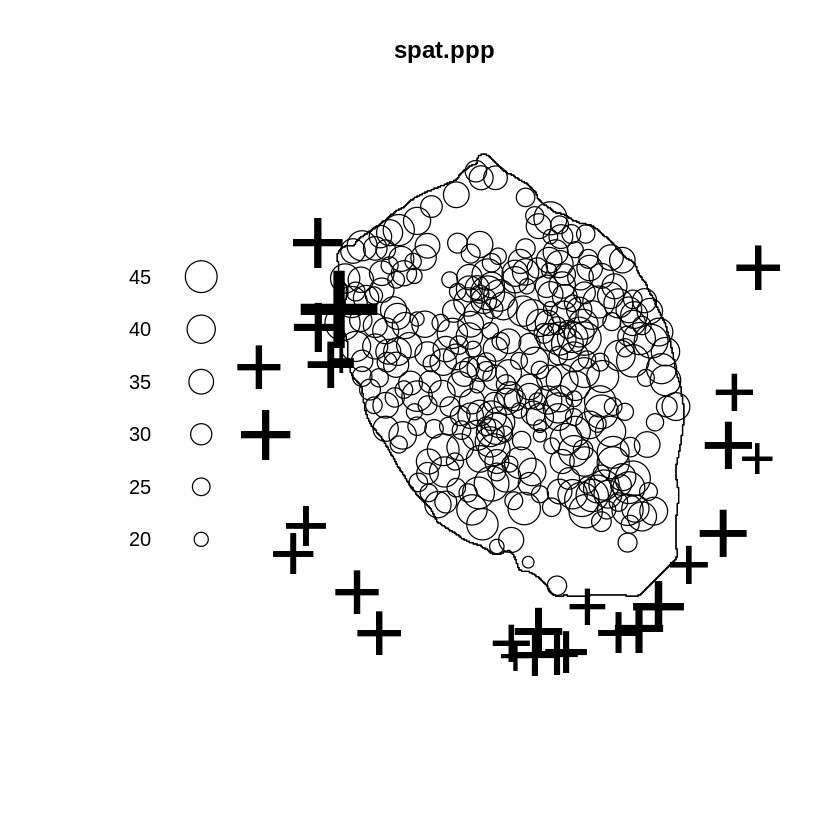

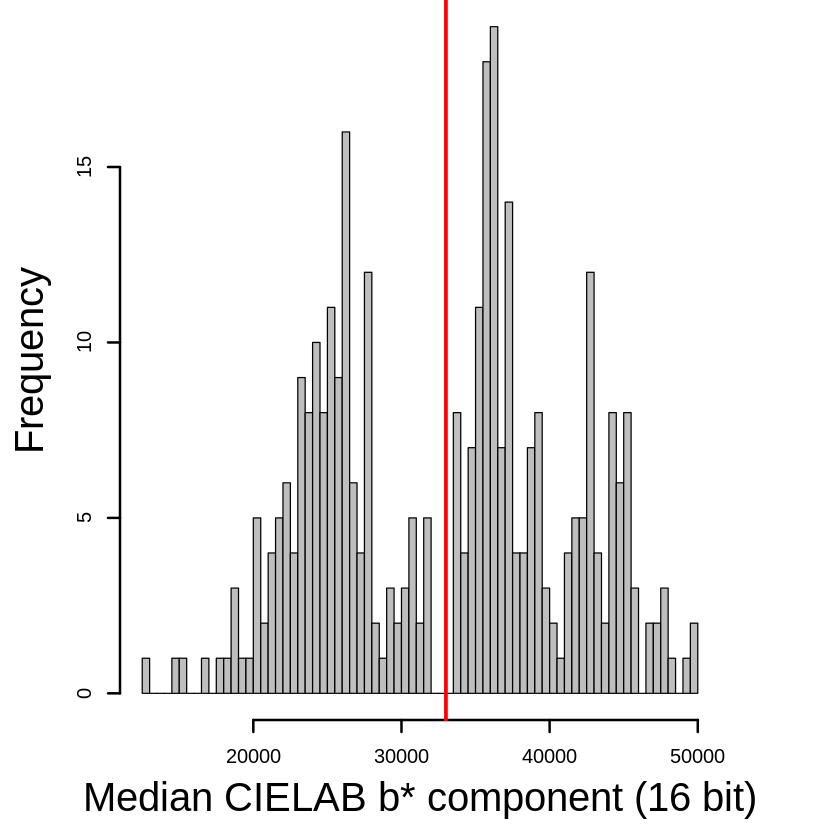

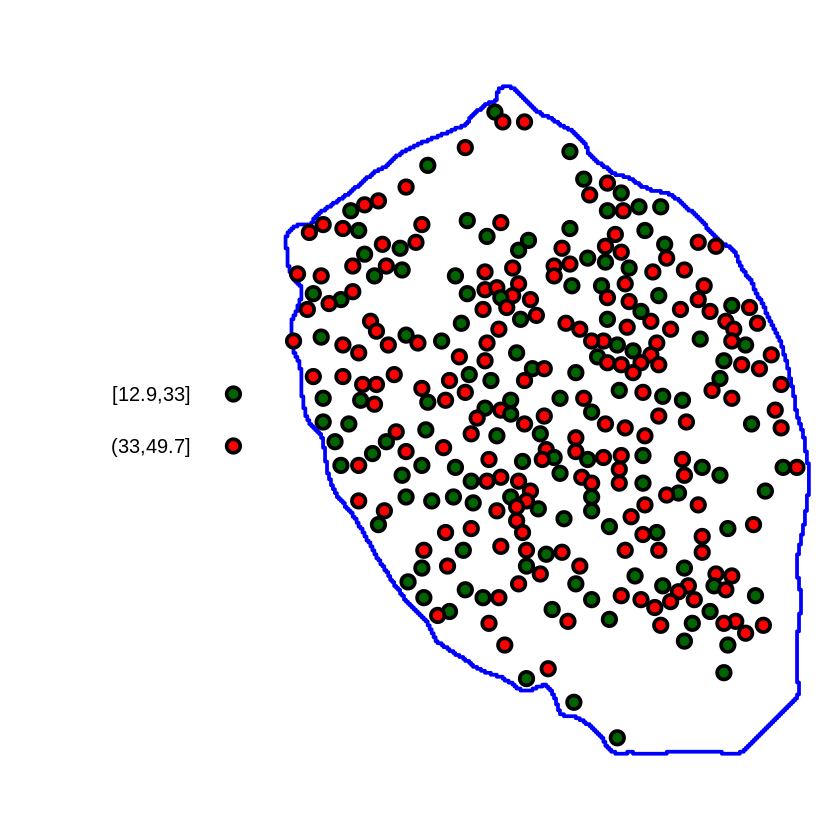

In [2]:
########################################################################################
#### Load the data describing the ROIs, and the mask defining the contours
########################################################################################

### spatial.data <- read.csv("/Users/rajwa/Dropbox/Projects/Pelot/Results-R3.csv", header=T)
### nerve.win <- readPNG("/Users/rajwa/Dropbox/Projects/Pelot/Mask 1.png")

url1 <- "https://www.dropbox.com/s/xlm5xss0cienzer/Results-R3.csv?dl=1"
GET(url1, write_disk(tf <- tempfile(fileext = ".csv")))
spatial.data <- read.csv(tf, header=T) 


url2 <- "https://www.dropbox.com/s/qgiukoom1g65yn2/Mask_1.png?dl=1"
GET(url2, write_disk(tf <- tempfile(fileext = ".png")))
nerve.win <- readPNG(tf)

nerve.win.mask <- matrix(ncol=ncol(nerve.win), nrow=nrow(nerve.win), data=!as.logical(nerve.win), byrow=F)
nerve.win.mask <- apply(t(nerve.win.mask),1,rev) 
nerve.owin <- owin(mask=nerve.win.mask)
nerve.poly <- as.polygonal(nerve.owin)

#### preview the boundary
plot(nerve.poly, box=T)

spatial.data.xy <- data.frame(X=round(spatial.data[,"XM"]), Y=round(432-spatial.data[,"YM"]))
spat.ppp <- ppp(x=spatial.data.xy[,1], y=spatial.data.xy[,2], marks=(spatial.data$GrMedian)/1000, window=nerve.poly, checkdup=F)

#### preview the points (accepted and rejected)
plot(spat.ppp)

#### preview the CIELAB b-component of the ROIs
par(mar=c(5,5,0,5))
hist(spatial.data$GrMedian, breaks=100, cex.lab=2, xlab="Median CIELAB b* component (16 bit)", lwd=2, col="grey", main="")
abline(v=33000, col="red", lwd=3)

#### define the cut-off to separate two staining hues (set on 33000)
spatial.data$B <- cut(spatial.data$GrMedian, breaks=c(12890, 33000, 49660 ))
levels(spatial.data$B) <- c("Low", "High")

#### separate the point pattern using pre-defined discretization cut-off 
spat.ppp.cut <- cut.ppp(spat.ppp, breaks=c(12890, 33000, 49660)/1000, include.lowest=T)

par(mar=c(0,0,0,0))
plot(spat.ppp.cut, cols=c("black", "black", "black","blue", "orange"), border="blue", bg=c("darkgreen", "red", "red"), 
     how="perspective", pch=21, cex=1.5, main="", legend=T, lwd=3)

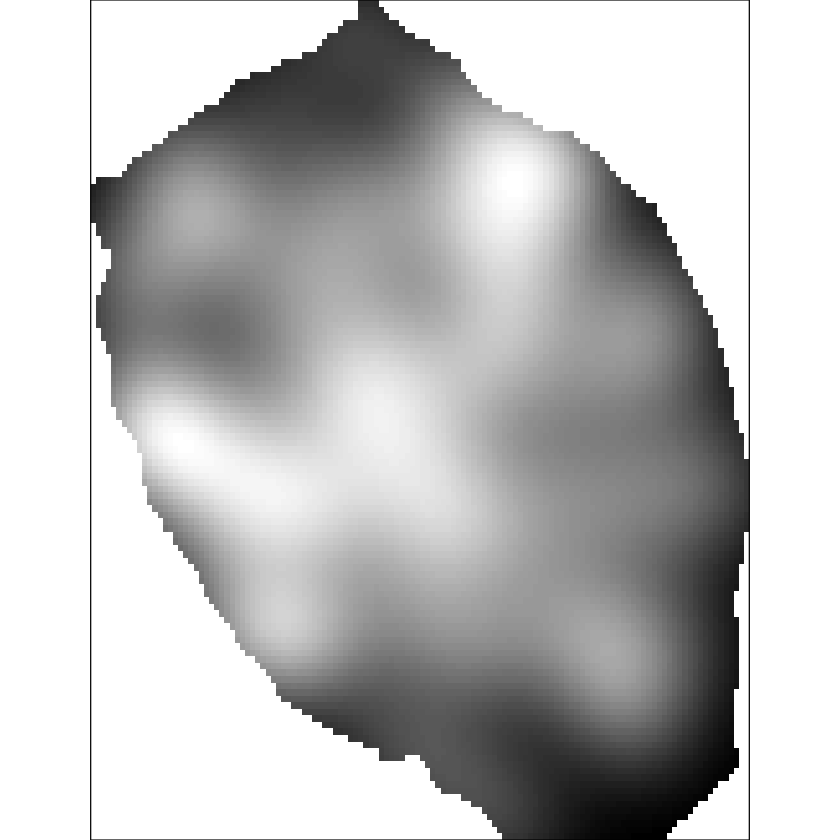

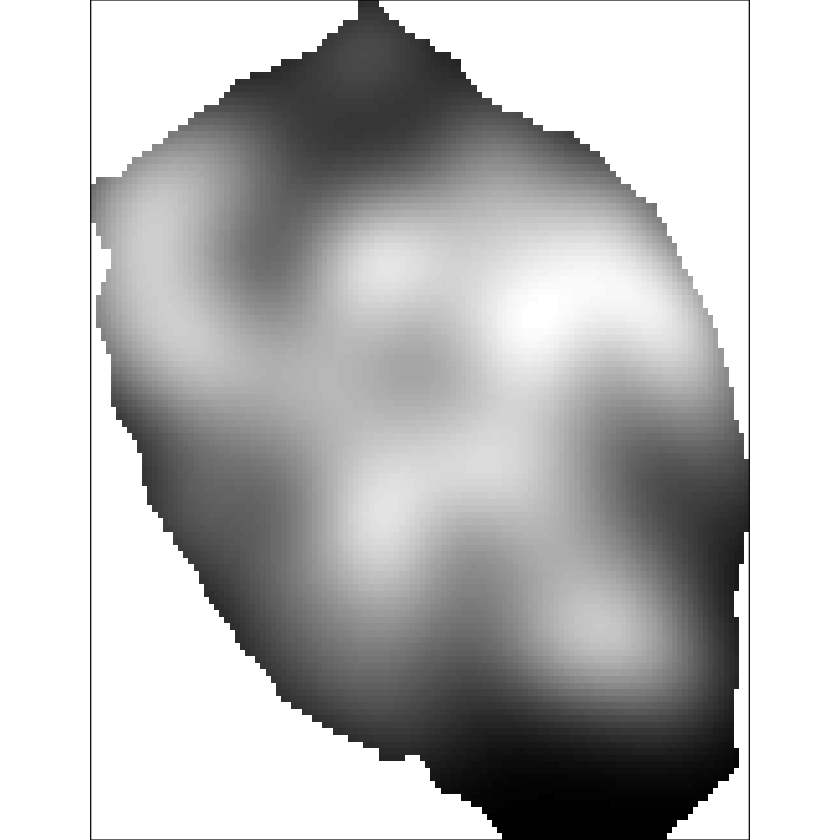

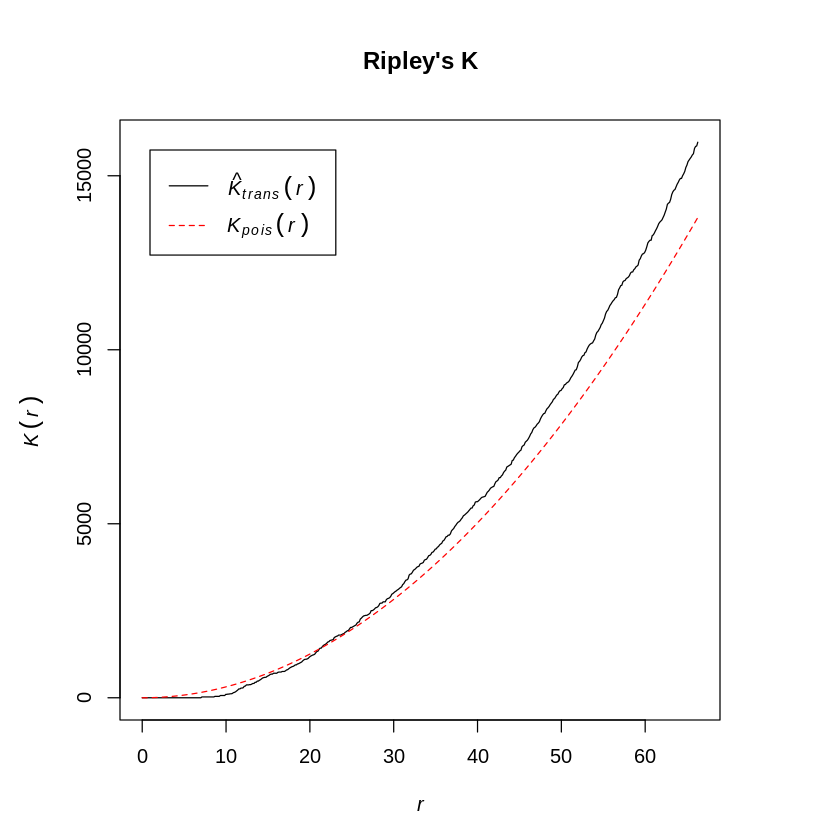

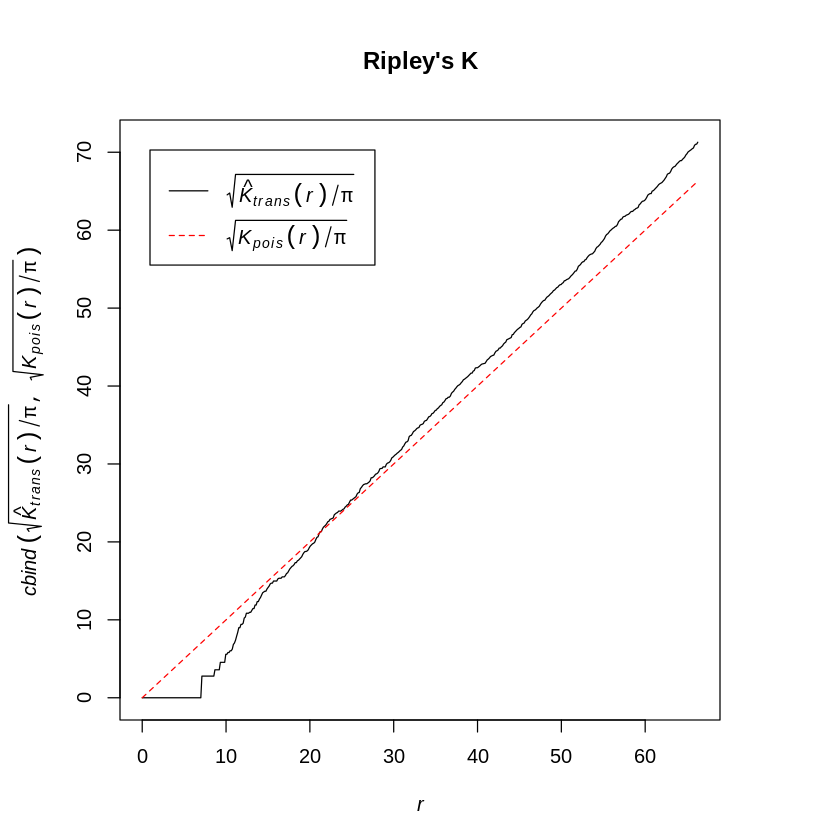

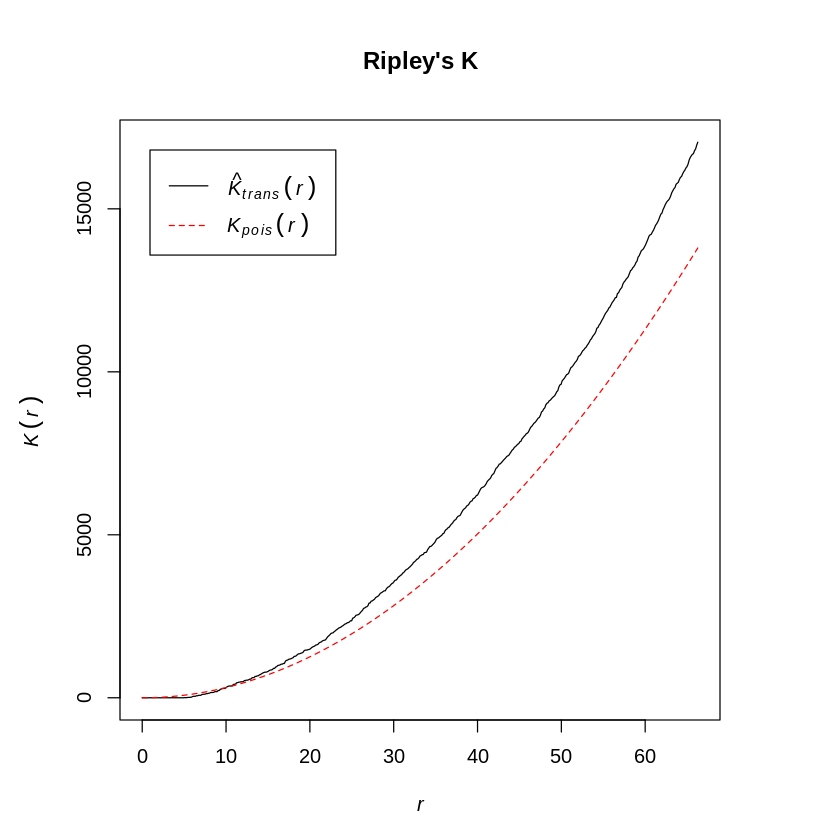

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.
Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


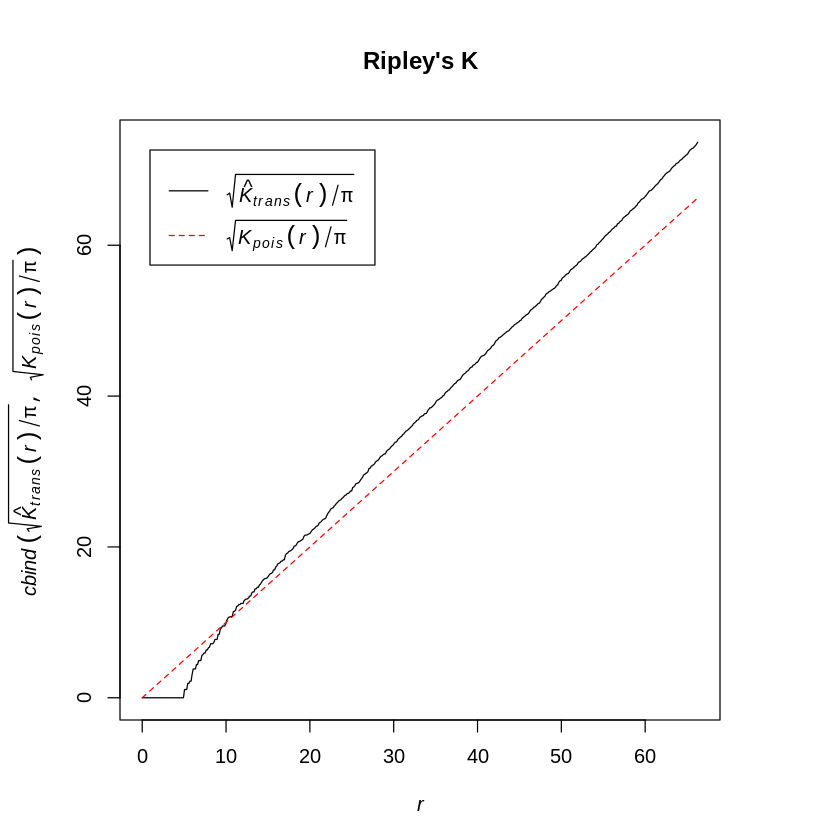

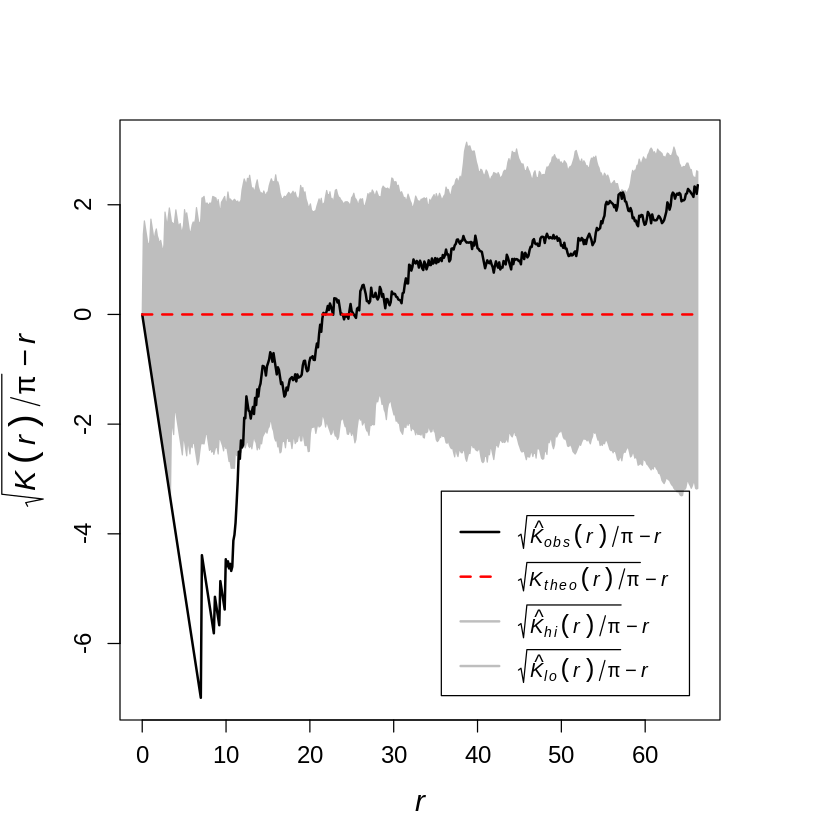

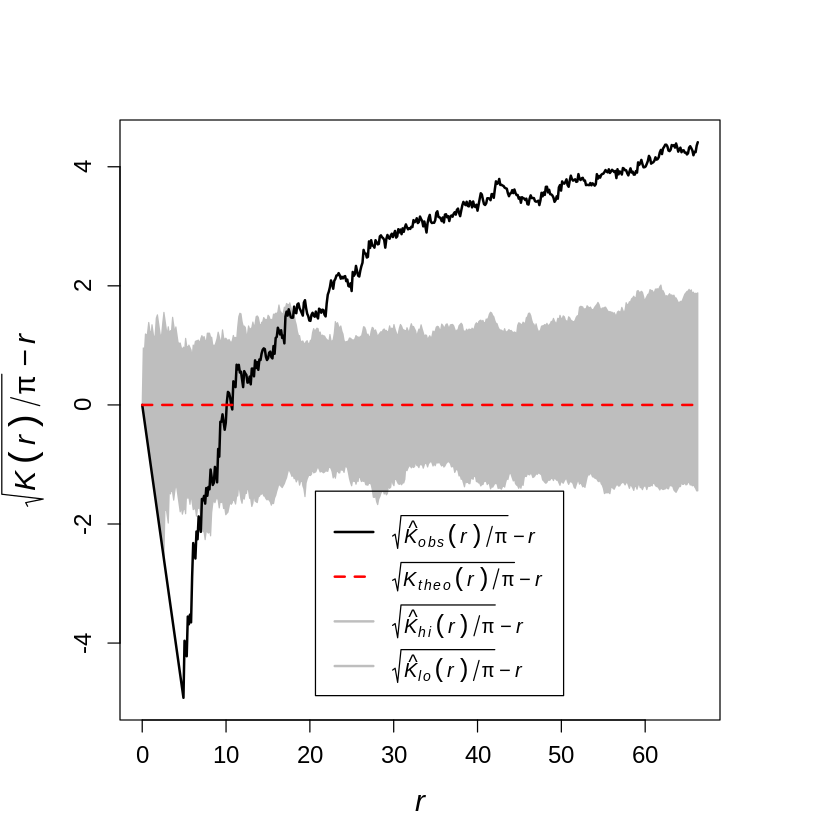

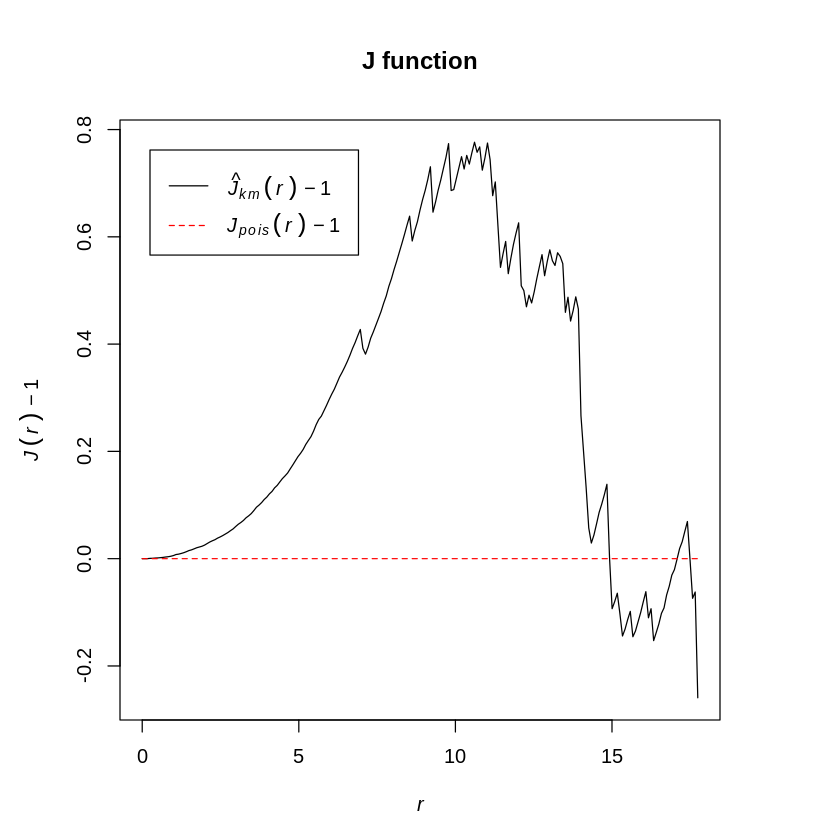

Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.
Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


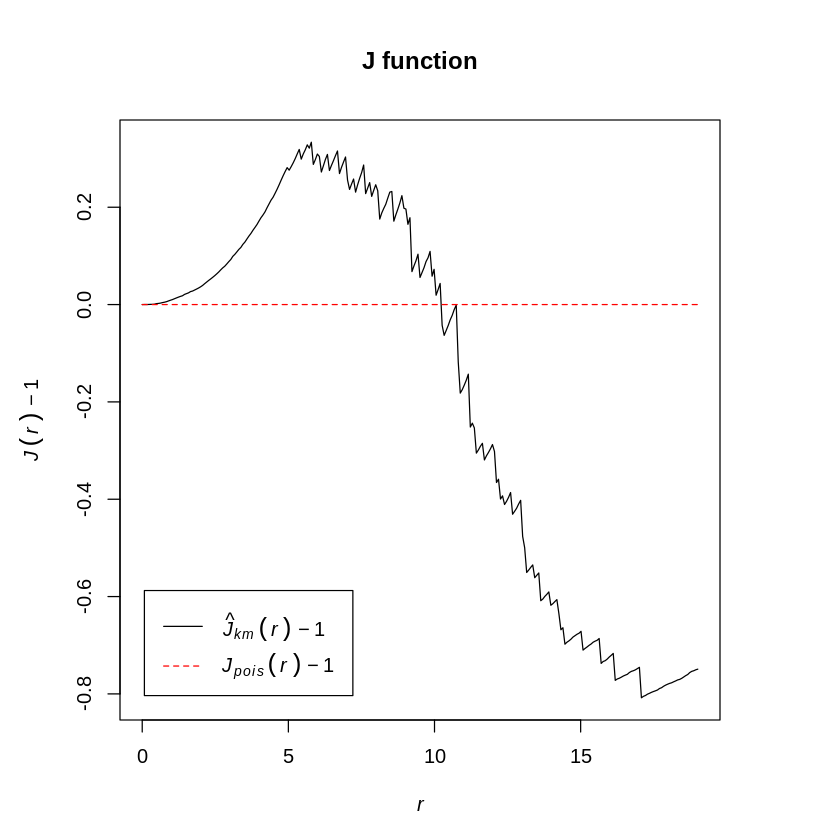

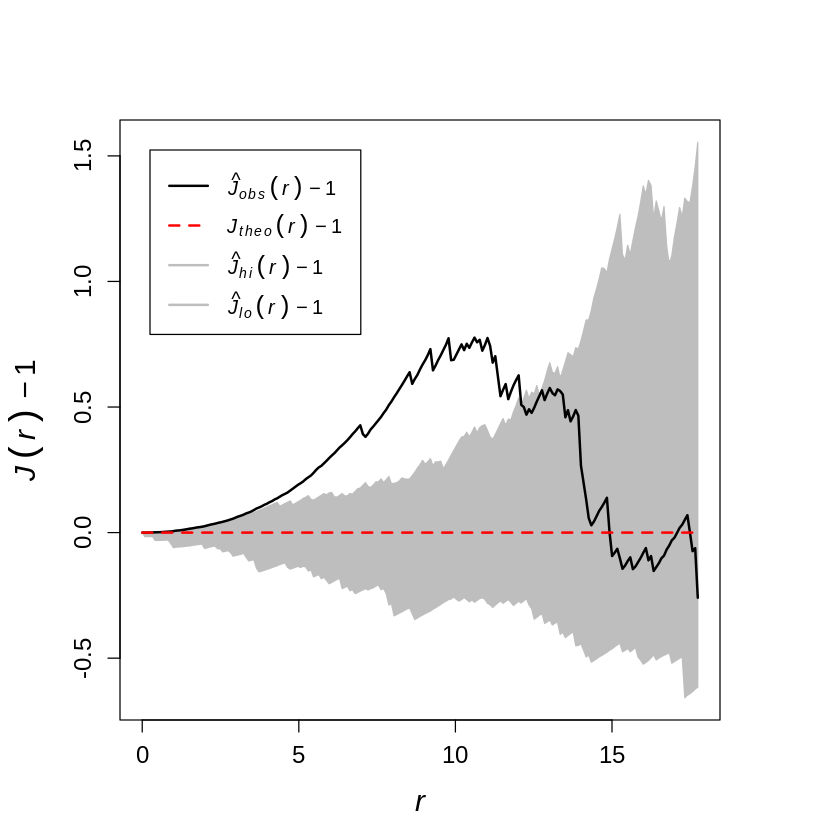


	Hopkins-Skellam test of CSR
	Monte Carlo test based on 9990 simulations of CSR with fixed n

data:  split(spat.ppp.cut)[[2]]
A = 0.65112, p-value = 0.005805
alternative hypothesis: two-sided


Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.
Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.


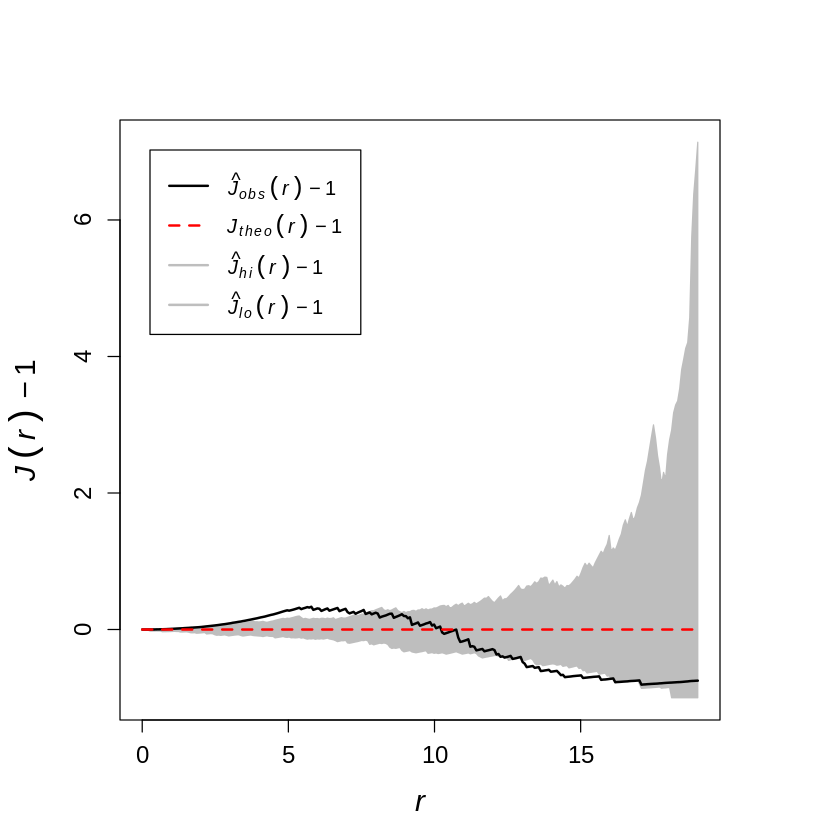

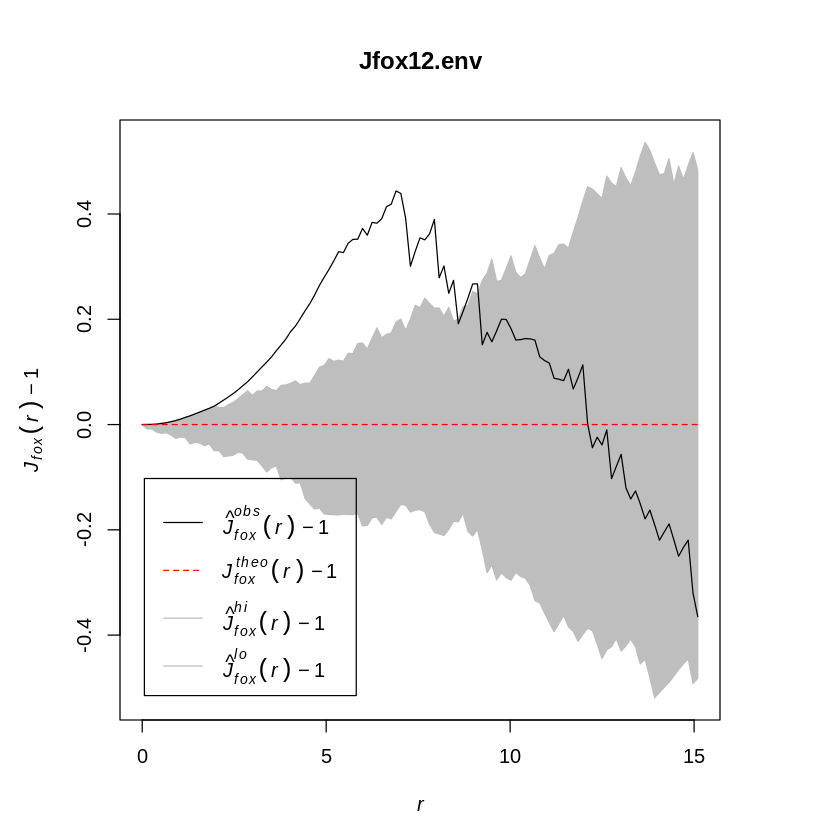

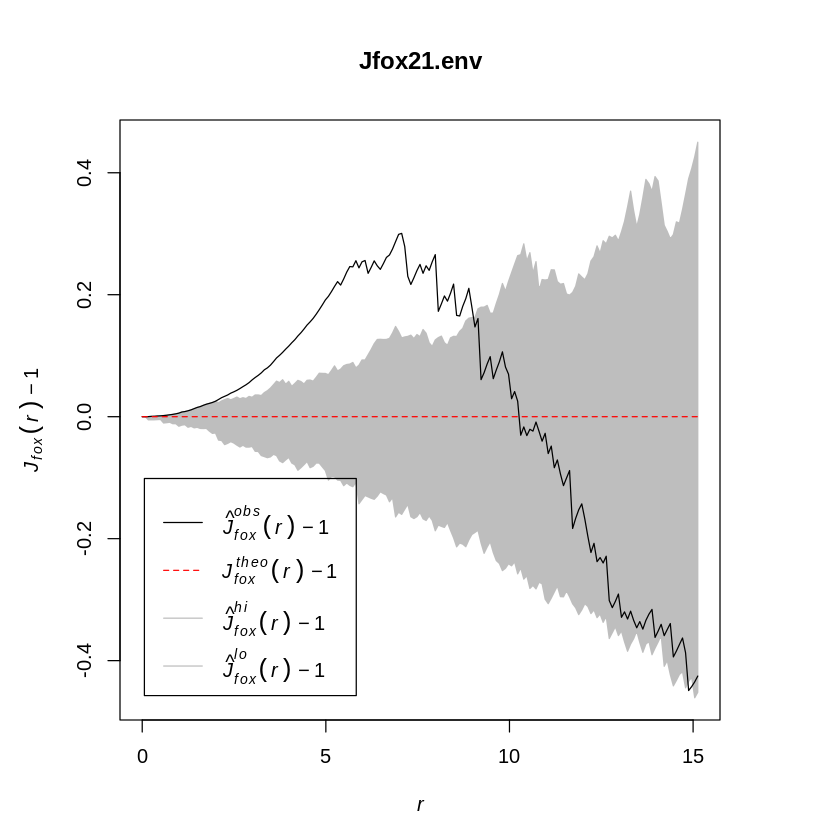

In [3]:
########################################################################################
#### make density maps for the high- and low-valued groups
########################################################################################

levels(spat.ppp.cut$marks) <- c("Low", "High")

#quartz(width = 6, height = 6)
par(mar=c(0,0,0,0))
plot(density(split(spat.ppp.cut)[[1]], sigma=20, fractional=T, diggle=T),ribbon=F, useRaster=T, main="",legend=F, col=grey.colors(100, start = 0, end = 1, gamma=1))
plot(density(split(spat.ppp.cut)[[2]], sigma=20, fractional=T, diggle=T),ribbon=F, useRaster=T, main="",legend=F, col=grey.colors(100, start = 0, end = 1, gamma=1))

#### Split the pattern, and analyze the resulting patterns separately
spat.ppp.1 <- split(spat.ppp.cut)[[1]]
spat.ppp.2 <- split(spat.ppp.cut)[[2]]

#### Simple estimate of the Ripley's K-function

K.1 <- Kest(spat.ppp.1, correction="translate")
K.2 <- Kest(spat.ppp.2, correction="translate")
par(mar=c(5,5,5,5))
plot(K.1, . ~ r,main="Ripley's K")
plot(K.1, cbind(sqrt(trans/pi), sqrt(theo/pi)) ~ r,main="Ripley's K")
plot(K.2, . ~ r,main="Ripley's K")
plot(K.2, cbind(sqrt(trans/pi), sqrt(theo/pi)) ~ r,main="Ripley's K")


K.1.env <- envelope(spat.ppp.1, fun=Kest, funargs=list(correction="best"))
K.2.env <- envelope(spat.ppp.2, fun=Kest, funargs=list(correction="best"))
plot(K.1.env, sqrt(./pi)-r ~ r, lwd=2, cex.lab=1.5, cex.axis=1.2, main="")
plot(K.2.env, sqrt(./pi)-r ~ r, lwd=2, cex.lab=1.5, cex.axis=1.2, main="")


#### Simple estimate of the J-function

J.1 <- Jest(spat.ppp.1, correction="best")
J.2 <- Jest(spat.ppp.2, correction="best")
par(mar=c(5,5,5,5))
plot(J.1, . - 1 ~ r,main="J function")
plot(J.2, . - 1 ~ r,main="J function")

J.1.env <- envelope(spat.ppp.1, fun=Jest, funargs=list(correction="best"), nsim=100 )
J.2.env <- envelope(spat.ppp.2, fun=Jest, funargs=list(correction="best"), nsim=100 )
plot(J.1.env, . -1 ~ r, lwd=2, cex.lab=1.5, cex.axis=1.2, main="")
plot(J.2.env, . -1 ~ r, lwd=2, cex.lab=1.5, cex.axis=1.2, main="")

#### Compute Hopkins-Skellam statistics

hopskel.test(split(spat.ppp.cut)[[2]], nsim=9990, method="MonteCarlo")


#### Compute Compute J-Foxall function

Jfox12.env <- envelope(Y=spat.ppp.1, fun=Jfox, funargs=list(spat.ppp.2), nsim=100 )
Jfox21.env <- envelope(Y=spat.ppp.2, fun=Jfox, funargs=list(spat.ppp.1), nsim=100 )
plot(Jfox12.env, . - 1 ~ r)
plot(Jfox21.env, . - 1 ~ r)

In [6]:
########################################################################################
#### Compute spatial autocorrelation
########################################################################################


bw <- 6
mI <- moransI(spatial.data.xy, bw, spatial.data$GrMode)#, WType="Bi-square")
moran.table <- matrix(data=NA,nrow=1,ncol=6)
col.names <- c("Moran's I", "Expected I", "Z resampling", "P-value resampling", "Z randomization", "P-value randomization")

colnames(moran.table) <- col.names

moran.table[1,1] <- mI$Morans.I
moran.table[1,2] <- mI$Expected.I
moran.table[1,3] <- mI$z.resampling
moran.table[1,4] <- mI$p.value.resampling
moran.table[1,5] <- mI$z.randomization
moran.table[1,6] <- mI$p.value.randomization

print(moran.table)

      Moran's I   Expected I Z resampling P-value resampling Z randomization
[1,] 0.01936283 -0.002967359    0.7607419          0.4468112       0.7605902
     P-value randomization
[1,]             0.4469019


Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


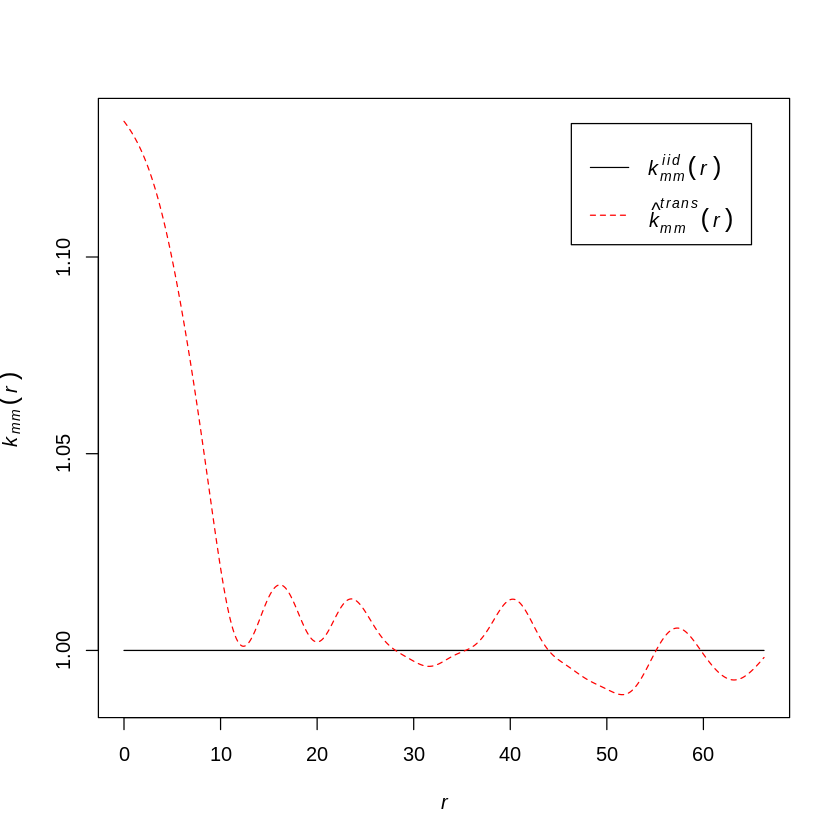

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


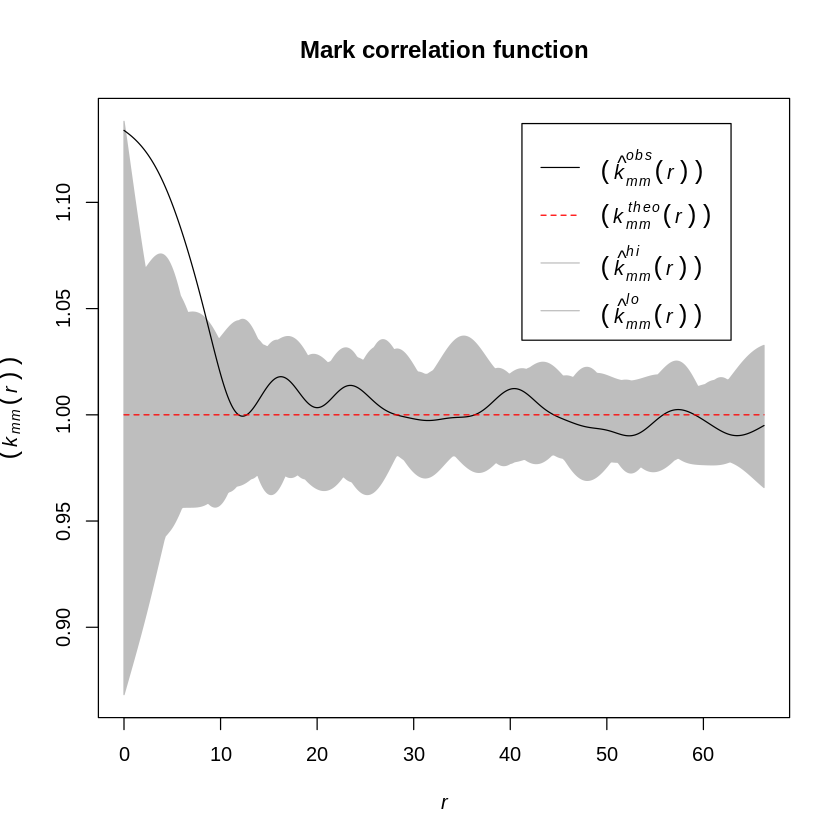

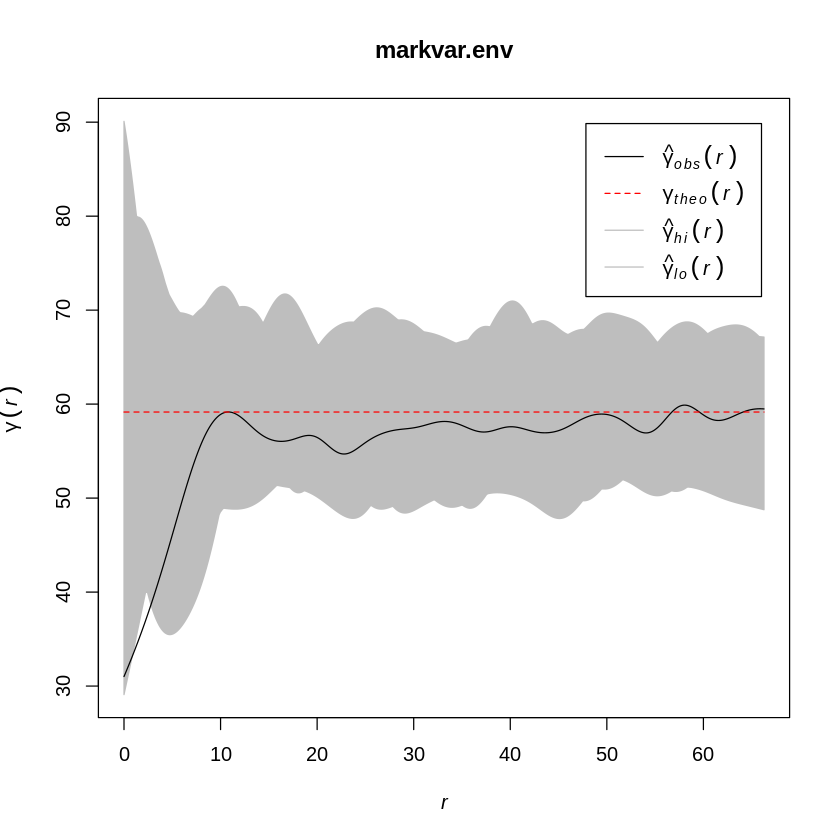

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


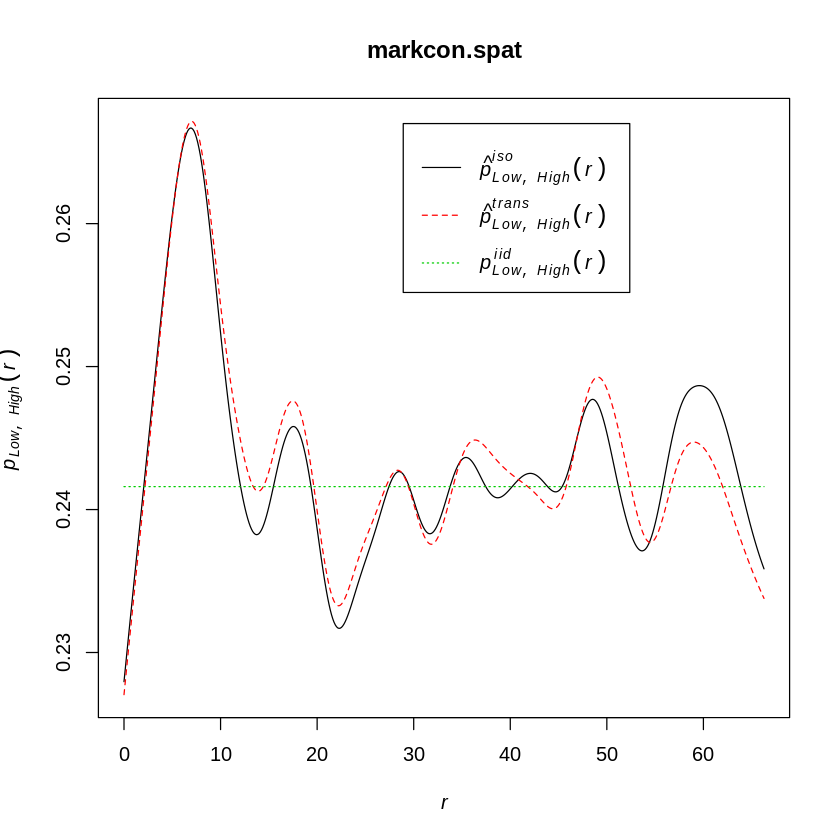

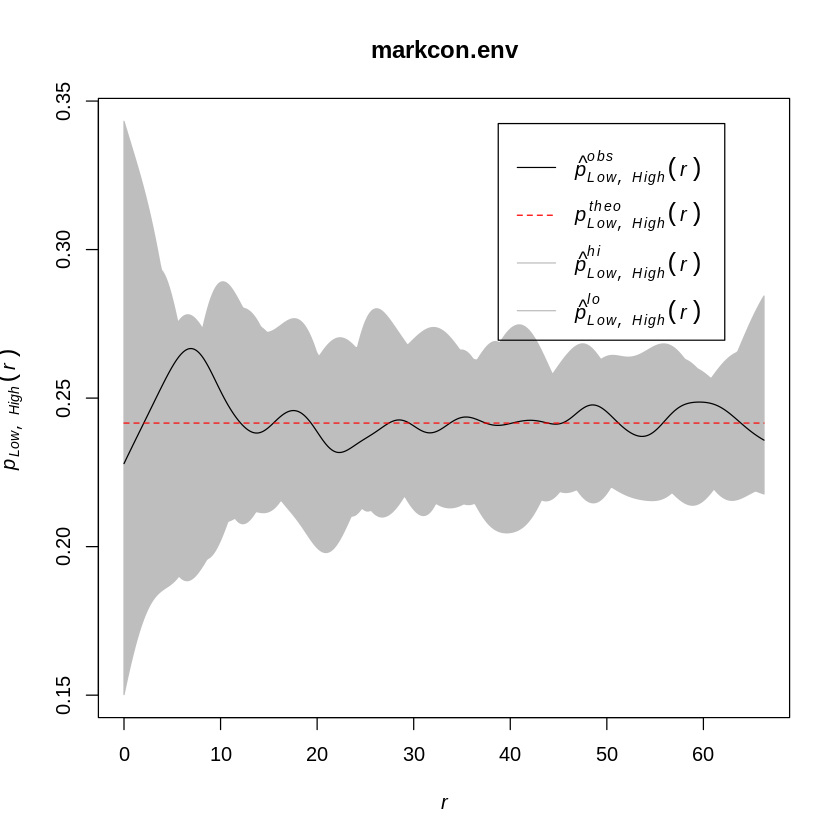

In [7]:
########################################################################################
#### Mark correlation and Mark variogram functions
########################################################################################


mark.spat <- markcorr(spat.ppp)
mark.env <- envelope(spat.ppp, fun=markcorr, nsim=100 )
plot(mark.spat, cbind(theo, trans) ~r, main="")
plot(mark.env, (.) ~r, main="Mark correlation function")


marvar.spat <- markvario(spat.ppp)
markvar.env <- envelope(spat.ppp, fun=markvario, nsim=100 )
plot(markvar.env)


markcon.spat <- markconnect(spat.ppp.cut, "Low", "High")
plot(markcon.spat)
markcon.env <- envelope(spat.ppp.cut, fun=markconnect, nsim=100 )
plot(markcon.env)

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


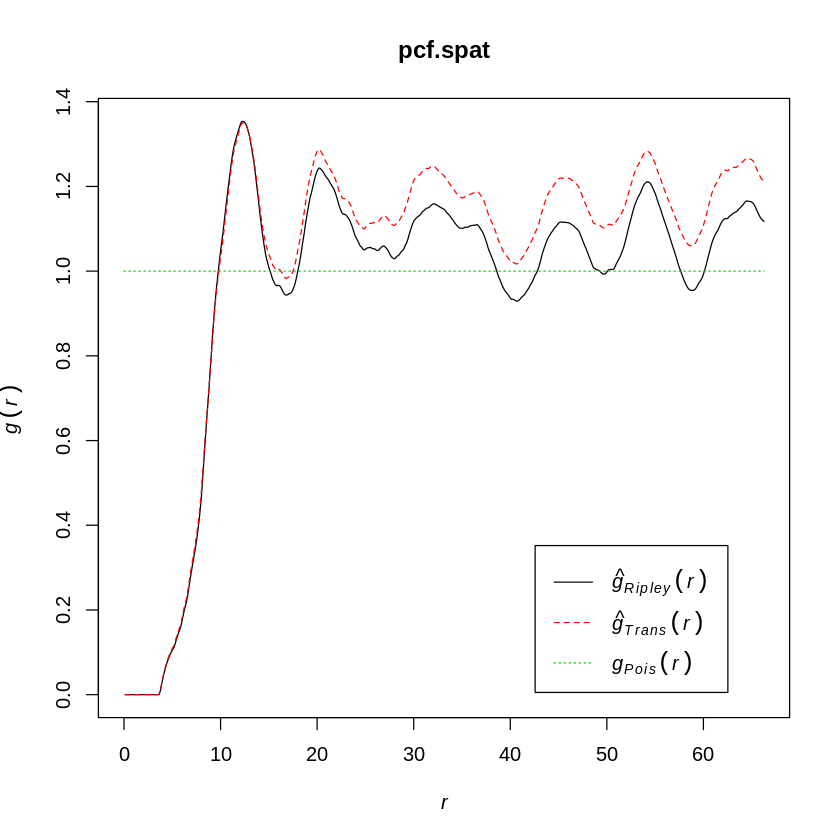

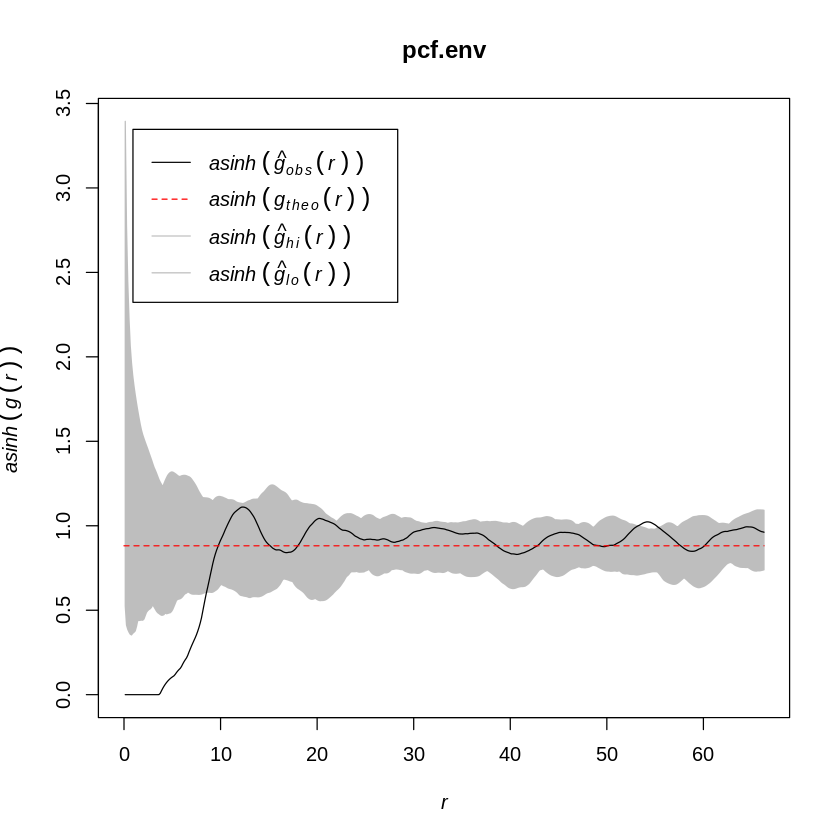

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


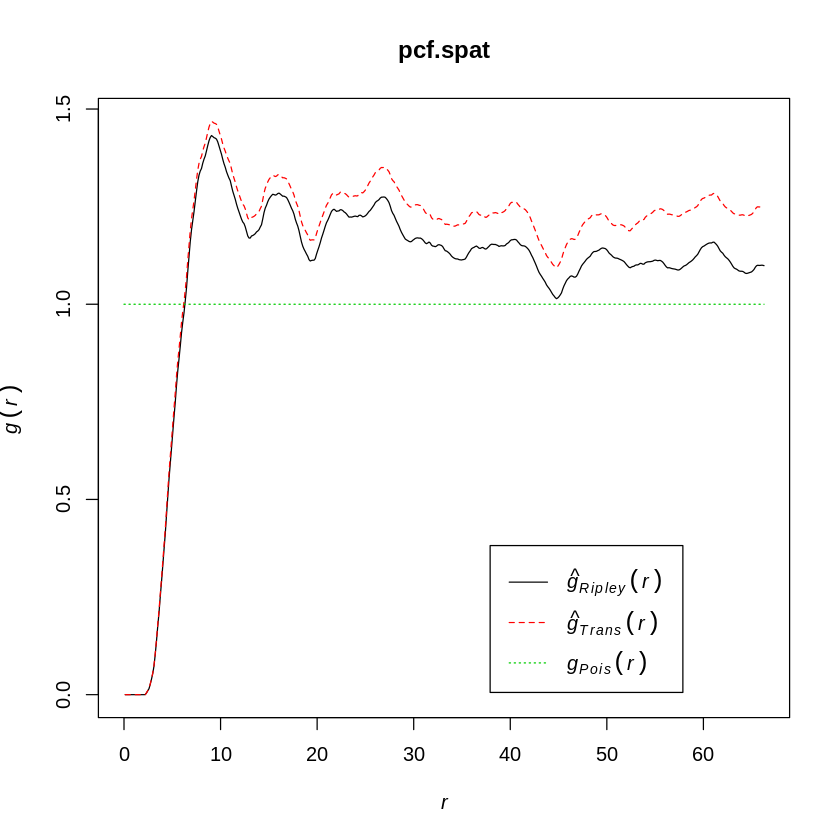

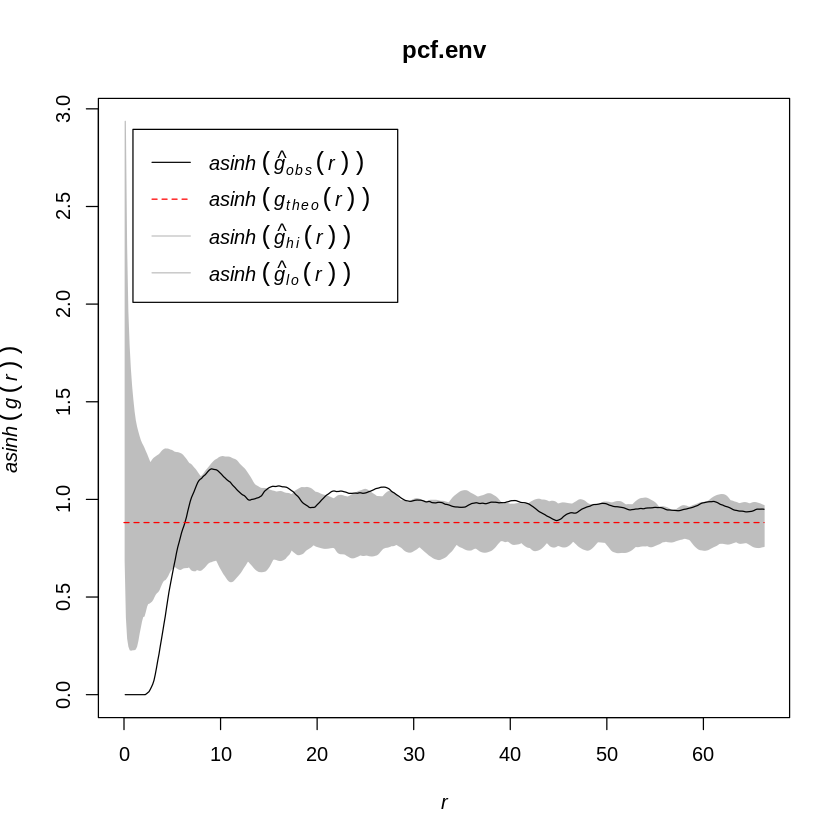

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


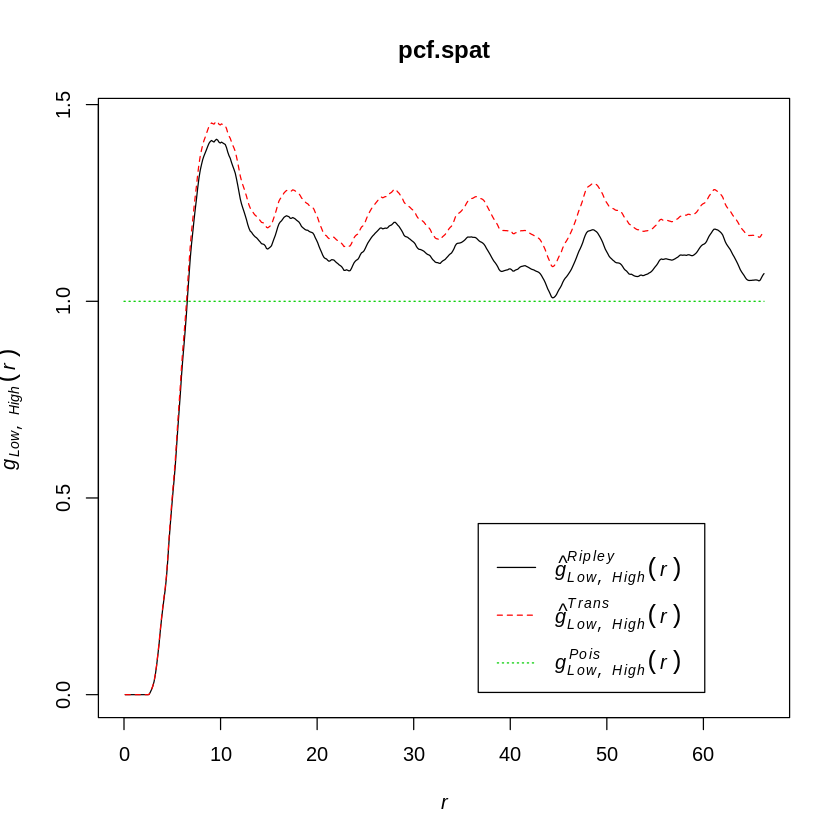

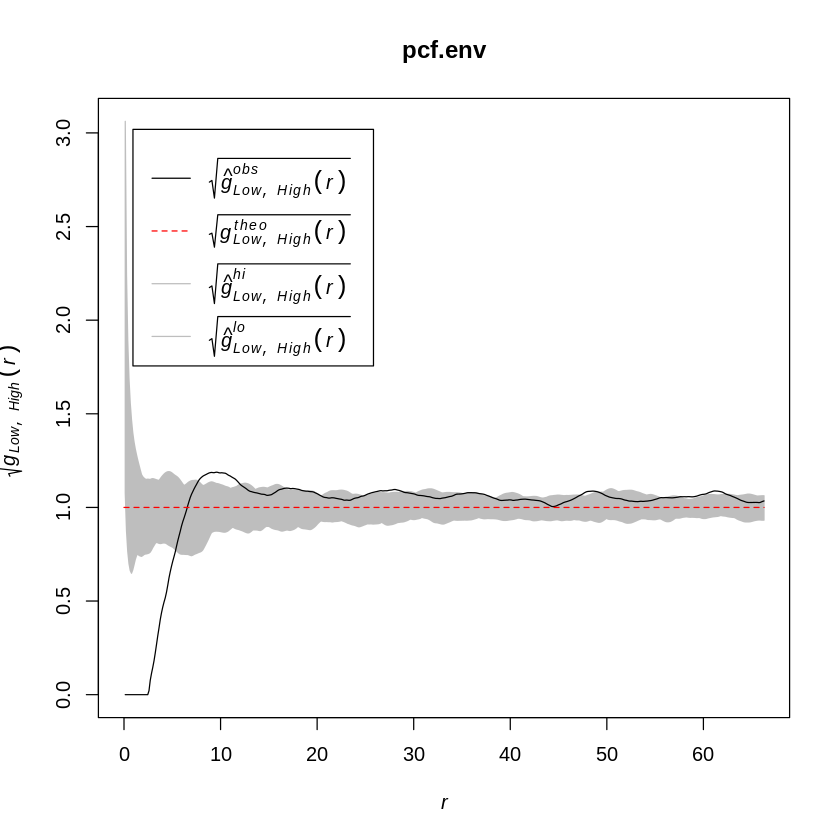

In [8]:
########################################################################################
#### Pair Correlation Functions
########################################################################################

pcf.spat <- pcf(spat.ppp.1)
plot(pcf.spat)
pcf.env <- envelope(spat.ppp.1, fun= pcf, nsim=100 )
plot(pcf.env, asinh(.) ~ r)
pcf.spat <- pcf(spat.ppp.2)
plot(pcf.spat)
pcf.env <- envelope(spat.ppp.2, fun= pcf, nsim=100 )
plot(pcf.env, asinh(.) ~ r)

pcf.spat <- pcfcross(spat.ppp.cut, "Low", "High")
plot(pcf.spat)
pcf.env <- envelope(spat.ppp.cut, fun= pcfcross, nsim=100 )
plot(pcf.env, sqrt(.) ~ r)

In [9]:
########################################################################################
#### Diggle-Cressie-Loosmore-Ford and Maximum Absolute Deviation Tests
########################################################################################

mad.test(spat.ppp.1, Fest, nsim=100, rmax=2, use.theo=T)
mad.test(spat.ppp.2, Fest, nsim=100, rmax=2, use.theo=T)
dclf.test(spat.ppp.1, Kest, nsim=100, use.theo=T)
dclf.test(spat.ppp.2, Kest, nsim=100, use.theo=T)

Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.



	Maximum absolute deviation test of CSR
	Monte Carlo test based on 100 simulations
	Summary function: F(r)
	Reference function: theoretical
	Alternative: two.sided
	Interval of distance values: [0, 42.4574218750149]
	Test statistic: Maximum absolute deviation
	Deviation = observed minus theoretical

data:  spat.ppp.1
mad = 0.060524, rank = 18, p-value = 0.1782


Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.



	Maximum absolute deviation test of CSR
	Monte Carlo test based on 100 simulations
	Summary function: F(r)
	Reference function: theoretical
	Alternative: two.sided
	Interval of distance values: [0, 35.7263671875126]
	Test statistic: Maximum absolute deviation
	Deviation = observed minus theoretical

data:  spat.ppp.2
mad = 0.067953, rank = 5, p-value = 0.0495


Generating 100 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  100.

Done.



	Diggle-Cressie-Loosmore-Ford test of CSR
	Monte Carlo test based on 100 simulations
	Summary function: K(r)
	Reference function: theoretical
	Alternative: two.sided
	Interval of distance values: [0, 66.2750000000233]
	Test statistic: Integral of squared absolute deviation
	Deviation = observed minus theoretical

data:  spat.ppp.1
u = 9777200, rank = 4, p-value = 0.0396


Generating 499 simulations of CSR  ...
1, 2, 3, .5 [etd 3:26] ....10 [etd 3:25] ....15 [etd 3:21] ....
20 [etd 3:19] ....25 [etd 3:19] ....30 [etd 3:20] ....35 [etd 3:16] ...
.40 [etd 3:13] ....45 [etd 3:12] ....50 [etd 3:12] ....55 [etd 3:11] ..
..60 [etd 3:11] ....65 [etd 3:08] ....70 [etd 3:07] ....75 [etd 3:04] .
...80 [etd 3:02] ....85 [etd 3:00] ....90 [etd 2:58] ....95
 [etd 2:55] ....100 [etd 2:54] ....105 [etd 2:52] ....110 [etd 2:49] ....
115 [etd 2:47] ....120 [etd 2:46] ....125 [etd 2:43] ....130 [etd 2:41] ...
.135 [etd 2:39] ....140 [etd 2:37] ....145 [etd 2:35] ....150 [etd 2:32] ..
..155 [etd 2:30] ....160 [etd 2:28] ....165 [etd 2:26] ....170 [etd 2:23] .
...175 [etd 2:21] ....180 [etd 2:19] ....185 [etd 2:17] ....190
 [etd 2:15] ....195 [etd 2:13] ....200 [etd 2:11] ....205 [etd 2:08] ....
210 [etd 2:06] ....215 [etd 2:04] ....220 [etd 2:02] ....225 [etd 1:59] ...
.230 [etd 1:57] ....235 [etd 1:54] ....240 [etd 1:52] ....245 [etd 1:50] ..
..250 [etd 1:48] ....255 [etd


	Diggle-Cressie-Loosmore-Ford test of CSR
	Monte Carlo test based on 499 simulations
	Summary function: K(r)
	Reference function: theoretical
	Alternative: two.sided
	Interval of distance values: [0, 66.2750000000233]
	Test statistic: Integral of squared absolute deviation
	Deviation = observed minus theoretical

data:  spat.ppp.2
u = 56093000, rank = 1, p-value = 0.002


In [ ]:
########################################################################################
#### Fit a statistical model
########################################################################################

spat.fit.1 <- ppm(spat.ppp.cut ~ 1,  Strauss(r=10), rbord=10)
spat.fit.2 <- ppm(spat.ppp.cut ~ polynom(x,y,2),  Strauss(r=10), rbord=10)
spat.fit.3 <- ppm(spat.ppp.cut ~ marks*polynom(x,y,2),  Strauss(r=10), rbord=10)

plot(spat.fit.2)

anova(spat.fit.0, spat.fit.1, spat.fit.2, spat.fit.3, test="LR")
sapply(list(spat.fit.0,spat.fit.1,spat.fit.2, spat.fit.3), AIC)


#spat.fit.1 <- kppm(spat.ppp.1 ~ polynom(x,y,2), "Thomas", method="palm")

sim.ppp <- simulate(spat.fit.3, nsim=4)

plot(sim.ppp, cols=c("black", "black", "black","blue", "orange"), border="blue", bg=c("darkgreen", "red", "red"), 
     how="perspective", pch=21, cex=0.5, main="", legend=F, lwd=1)